In [1]:
import torch
print(torch.__version__)

2.8.0


In [2]:
import numpy as np

# creating tensor from python list and numpy array

np.set_printoptions(precision=3)
a = [1,2,3]
b = np.array([4,5,6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)
print(t_a.shape)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)
torch.Size([3])


In [3]:
# using tensor where each element has value 1
t_ones = torch.ones(2,3)

print(t_ones.shape)
print(t_ones)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
# creating random tensors
rand_tensor = torch.rand(2,6)
print(rand_tensor)

tensor([[0.1881, 0.1763, 0.1611, 0.6785, 0.2358, 0.8976],
        [0.2221, 0.6277, 0.5188, 0.3166, 0.2377, 0.1457]])


In [5]:
# changing data type of tensor using torch.to()

t_a_new = t_a.to(dtype=torch.int64)
print(t_a_new.dtype)

torch.int64


In [6]:
# creating transpose of tensor

t = torch.rand(3,5)
t_tr = t.transpose(1,0)
t_tr_2 = torch.transpose(t, 0,1) # this is another method to do the same thing and as u might've
# noticed that i swapped dim here and it actually doesn't matter u just have to write 0 and 1, order doesn't even matter
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [7]:
# reshaping tensors 

tensor = torch.zeros(30)
print(tensor)
print(tensor.shape)
t_reshaped = tensor.reshape(5,6) # multiplication of dimensions should be same as no.vaules in original tensor 
print(t_reshaped)
print(t_reshaped.shape)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])
torch.Size([30])
tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
torch.Size([5, 6])


In [8]:
import torch
# squeezing i.e removing unnecessary dimensions

t = torch.zeros(1, 2, 1,2,1)
t_sqz = torch.squeeze(t, 2) # You can only squeeze the dimensions that have a size of 1
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 2, 1])  -->  torch.Size([1, 2, 2, 1])


In [9]:
torch.manual_seed(32)

t1 = 2 * torch.rand(2,4) - 1
t2 = torch.normal(mean=0, std=1, size=(2,4))
print(f't1: {t1}')
print(f't2: {t2}')

# finding elementwise multiplication of tensors

t3 = torch.multiply(t1, t2)
print(f'multiplied ans: {t3}')

t1: tensor([[ 0.7513, -0.4559, -0.1719,  0.5714],
        [-0.7741,  0.1587,  0.2962, -0.9542]])
t2: tensor([[-0.4169, -1.2650,  1.2367,  0.1980],
        [-1.5811,  0.4532,  2.3502, -0.3888]])
multiplied ans: tensor([[-0.3132,  0.5767, -0.2126,  0.1132],
        [ 1.2239,  0.0719,  0.6960,  0.3710]])


In [10]:
# to find sum along axis 
sum = torch.sum(t3, 0)
print(sum)

# to find mean 
mean = torch.mean(t3, axis=0)
print(mean)

# to find std
std = torch.std(t3, axis=0)
print(std)

tensor([0.9107, 0.6486, 0.4835, 0.4841])
tensor([0.4553, 0.3243, 0.2417, 0.2421])
tensor([1.0868, 0.3569, 0.6425, 0.1823])


In [11]:
# matrix multiplication

t1 = torch.rand(3,5)
t2 = torch.rand(3,5)

t3 = torch.matmul(t1, t2.T) # take transpose to make matmul happen 
print(t3.shape)
print(t3)

torch.Size([3, 3])
tensor([[0.8454, 0.4816, 0.7077],
        [1.7800, 0.4762, 1.2089],
        [1.6590, 0.6283, 1.3121]])


In [12]:
# finding L^p norm
norm_t1 = torch.linalg.norm(t1, ord=2, dim=0)
print(norm_t1)

tensor([1.2121, 0.6590, 1.0984, 0.9991, 0.3953])


In [13]:
torch.manual_seed(1)

# splitting tensors using chunk method 

t = torch.rand(6)
t_split = torch.chunk(t,3) # the integer we provide here, the original tensor must be able to devide in the splits of that integer
print(t_split)

# splitting tensor using split method 

t2 = torch.rand(5)
print(t2)
t2_split = torch.split(t2, split_size_or_sections=[3,2]) # the sum of dims of split size should be equal to size of original tensor in our case its 5
print(t2_split)

(tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999]))
tensor([0.3971, 0.7544, 0.5695, 0.4388, 0.6387])
(tensor([0.3971, 0.7544, 0.5695]), tensor([0.4388, 0.6387]))


In [14]:
# concatenating tensors using stack
a = torch.ones(3)
b = torch.zeros(3)
c = torch.stack([a,b], axis=1)
print(c)

# using cat method 
# a = torch.ones(2)
# b = torch.zeros(2)
# c = torch.cat([a,b], axis=1)
# print(c)
# above code will throw an error because i'm trying to concatnate two tensors along axis 1 but their 
# is no axis 1, it only has one asix 0 (as its only one row) and hence it will throw an error

# this is the correct code
a = torch.ones(2,2)
b = torch.zeros(2,2)
c = torch.cat([a,b], axis=1)
print(c)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
tensor([[1., 1., 0., 0.],
        [1., 1., 0., 0.]])


In [15]:
# creating simplest dataloader object

from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.int32)

data_loader = DataLoader(t)

for item in data_loader:
    print(item)

# we could also specify specific batch size

data_loader = DataLoader(t, batch_size=3, drop_last=False)

for item in data_loader:
    print(item)

tensor([0], dtype=torch.int32)
tensor([1], dtype=torch.int32)
tensor([2], dtype=torch.int32)
tensor([3], dtype=torch.int32)
tensor([4], dtype=torch.int32)
tensor([5], dtype=torch.int32)
tensor([0, 1, 2], dtype=torch.int32)
tensor([3, 4, 5], dtype=torch.int32)


In [16]:
# cobining two different tensors and then retrieving elements from them as tuple

torch.manual_seed(42)

t_x = torch.rand(size=[4,3], dtype=torch.float32)
t_y = torch.arange(4)

# building custom Dataset using Dataset class
from torch.utils.data import Dataset

class JoinDataset(Dataset):
    def __init__(self,x,y):
        super().__init__()
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
# custom dataset class must contain init and getitem methods to be recognized as Dataset in pytroch 

In [17]:
dataset = JoinDataset(t_x,t_y)

for item in dataset:
    print(item)

(tensor([0.8823, 0.9150, 0.3829]), tensor(0))
(tensor([0.9593, 0.3904, 0.6009]), tensor(1))
(tensor([0.2566, 0.7936, 0.9408]), tensor(2))
(tensor([0.1332, 0.9346, 0.5936]), tensor(3))


In [18]:
# we can also use built-in method in pytorch instead of creating our own custom Dataset

from torch.utils.data import TensorDataset

joint_dataset = TensorDataset(t_x, t_y)

for item in dataset:
    print(item)

(tensor([0.8823, 0.9150, 0.3829]), tensor(0))
(tensor([0.9593, 0.3904, 0.6009]), tensor(1))
(tensor([0.2566, 0.7936, 0.9408]), tensor(2))
(tensor([0.1332, 0.9346, 0.5936]), tensor(3))


In [19]:
# enumerating over shuffled dataset using dataloader object (we use this object to shuffle data too)
torch.manual_seed(42)

data_loader_s = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader):
    print(f'batch {i}:\n'
          f'x: {batch[0]}\n'
          f'y: {batch[1]}\n')

batch 0:
x: 0
y: 1

batch 1:
x: 3
y: 4



In [20]:
# iterating over a dataset for multiple times

epoch = 2

for e in range(epoch):
    print(f'epoch {e+1}')
    for i, batch in enumerate(data_loader_s, 1): # 1 here just starts enumerating from 1 instead of 0
        print(f'batch {i}:\n'
              f'x: {batch[0]}\n'
              f'y: {batch[1]}')

epoch 1
batch 1:
x: tensor([[0.8823, 0.9150, 0.3829],
        [0.1332, 0.9346, 0.5936]])
y: tensor([0, 3])
batch 2:
x: tensor([[0.2566, 0.7936, 0.9408],
        [0.9593, 0.3904, 0.6009]])
y: tensor([2, 1])
epoch 2
batch 1:
x: tensor([[0.8823, 0.9150, 0.3829],
        [0.1332, 0.9346, 0.5936]])
y: tensor([0, 3])
batch 2:
x: tensor([[0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]])
y: tensor([1, 2])


In [21]:
# creating file list of our files 

import pathlib

imgdir_path = pathlib.Path('data/')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['data/cat-01.jpg', 'data/cat-02.jpg', 'data/cat-03.jpg', 'data/dog-01.jpg', 'data/dog-02.jpg', 'data/dog-03.jpg']


image shape: (900, 1200, 3)
image shape: (900, 1200, 3)
image shape: (900, 742, 3)
image shape: (800, 1200, 3)
image shape: (800, 1200, 3)
image shape: (900, 1200, 3)


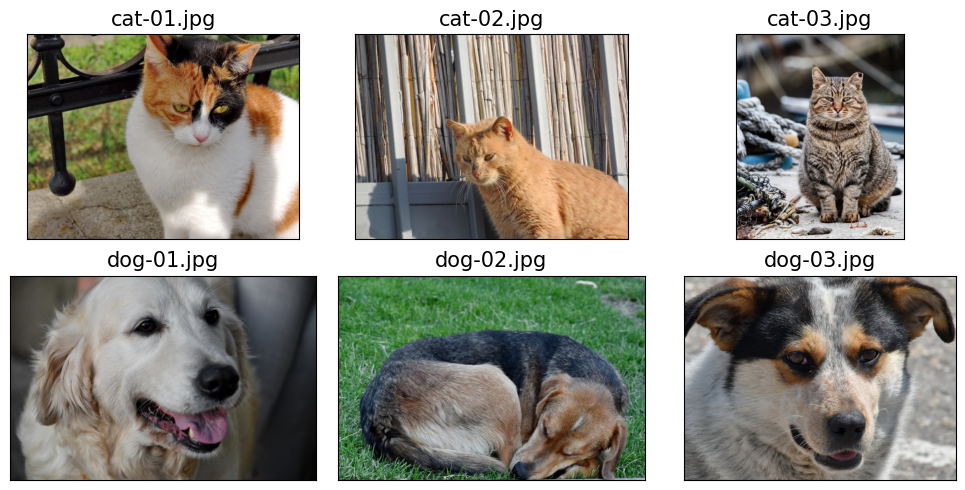

In [22]:
# printing images 

import matplotlib.pyplot as plt 
import os
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print(f'image shape: {np.array(img).shape}')
    ax = fig.add_subplot(2,3, i+1)
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [23]:
# creating list of labels from given list of files

labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [24]:
# creating custom dataset 

class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

In [25]:
image_dataset = ImageDataset(file_list, labels)

for file, label in image_dataset:
    print(file, label)

data/cat-01.jpg 0
data/cat-02.jpg 0
data/cat-03.jpg 0
data/dog-01.jpg 1
data/dog-02.jpg 1
data/dog-03.jpg 1


In [26]:
# creating pipeline of transforms 
from torchvision.transforms import transforms

img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
])

In [27]:
# changing our ImageDataset class to add transforms in it 
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label

In [28]:
image_dataset = ImageDataset(file_list, labels, transform)
for i in image_dataset:
    print(i[0].numpy().transpose((1,2,0)))

[[[0.698 0.643 0.569]
  [0.702 0.651 0.576]
  [0.651 0.596 0.518]
  ...
  [0.282 0.278 0.286]
  [0.239 0.227 0.208]
  [0.459 0.459 0.357]]

 [[0.706 0.667 0.584]
  [0.722 0.686 0.604]
  [0.702 0.655 0.565]
  ...
  [0.094 0.09  0.098]
  [0.09  0.082 0.082]
  [0.165 0.153 0.153]]

 [[0.737 0.702 0.631]
  [0.722 0.678 0.592]
  [0.612 0.545 0.439]
  ...
  [0.153 0.141 0.145]
  [0.184 0.173 0.176]
  [0.22  0.2   0.2  ]]

 ...

 [[0.553 0.506 0.451]
  [0.502 0.451 0.388]
  [0.482 0.416 0.325]
  ...
  [0.965 0.925 0.898]
  [0.984 0.945 0.929]
  [0.98  0.945 0.925]]

 [[0.529 0.482 0.42 ]
  [0.522 0.475 0.408]
  [0.49  0.435 0.353]
  ...
  [0.957 0.922 0.894]
  [0.973 0.941 0.918]
  [0.973 0.945 0.922]]

 [[0.494 0.443 0.384]
  [0.506 0.459 0.396]
  [0.498 0.447 0.369]
  ...
  [0.945 0.91  0.886]
  [0.961 0.929 0.906]
  [0.969 0.941 0.918]]]
[[[0.373 0.341 0.322]
  [0.353 0.341 0.345]
  [0.404 0.396 0.408]
  ...
  [0.604 0.541 0.49 ]
  [0.639 0.576 0.51 ]
  [0.698 0.631 0.6  ]]

 [[0.361 0.322

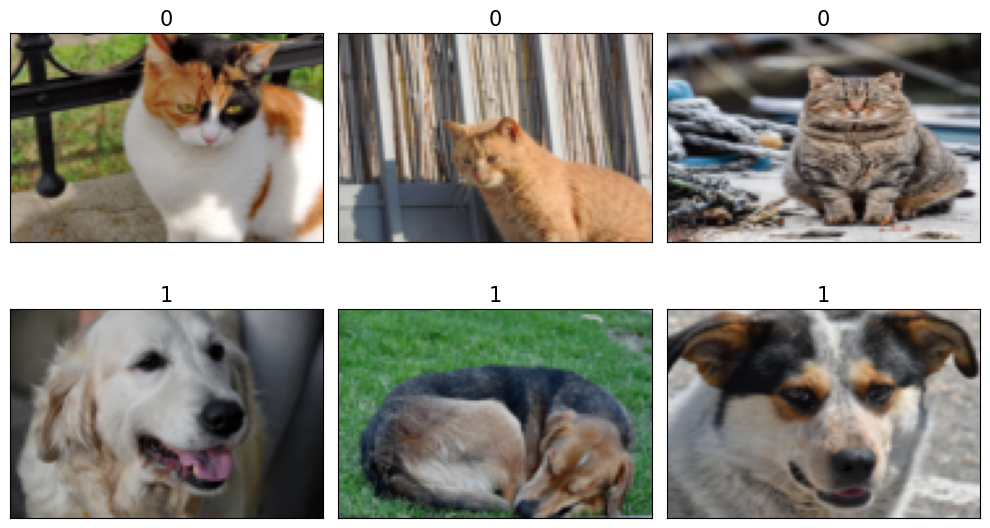

In [29]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2,3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1,2,0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

In [30]:
import torchvision

image_path = 'MNIST/'

mnist_dataset = torchvision.datasets.MNIST(
    image_path, 'train', download=False
)

(<PIL.Image.Image image mode=L size=28x28 at 0x12CE6C2C0>, 5)


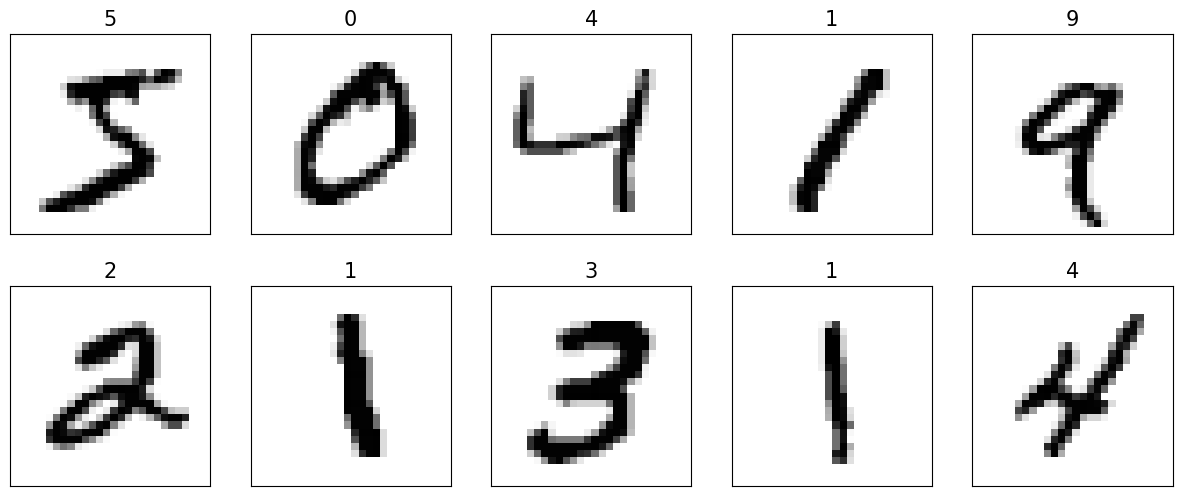

In [31]:
from itertools import islice
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

toy_data = []
for i in range(10):
    toy_data.append(next(iter(mnist_dataset)))

fig = plt.figure(figsize=(15,6))

for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2,5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)
plt.show()

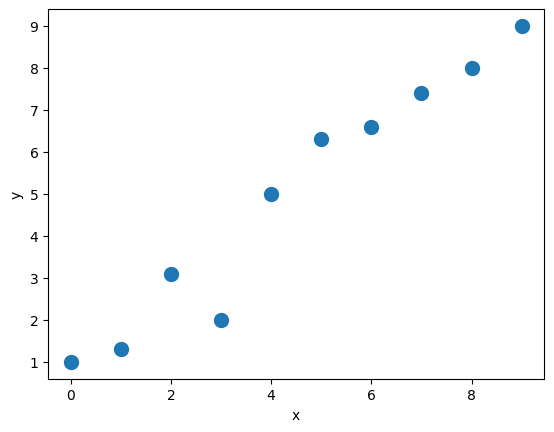

In [32]:
X_train = np.arange(10, dtype='float32').reshape(10,1)
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
                    6.3, 6.6,7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:
# creatind a toy dataset to build simple linear regression model on it
from torch.utils.data import TensorDataset

X_train_norm = (X_train - np.mean(X_train))/ np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1

dl = DataLoader(train_ds, batch_size, shuffle=True)

In [34]:
# defining weights and bias
torch.manual_seed(42)

weight = torch.randn(1)
weight.requires_grad_()

bias = torch.zeros(1, requires_grad=True)

# building model function which performs forward pass 
def model(xb):
    return xb @ weight + bias

In [35]:
# defining mse loss function 

def loss_func(outputs, targets):
    return (outputs - targets).pow(2).mean()

In [36]:
# training our model on our toy dataset and using torch.bacward to calculate gradients

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in dl:
        pred = model(x_batch)
        loss = loss_func(pred, y_batch.long())
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch%log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 57.6040
Epoch 10 Loss 29.7644
Epoch 20 Loss 19.6541
Epoch 30 Loss 1.0303
Epoch 40 Loss 6.8862
Epoch 50 Loss 0.0096
Epoch 60 Loss 2.5361
Epoch 70 Loss 0.0037
Epoch 80 Loss 3.1255
Epoch 90 Loss 0.3399
Epoch 100 Loss 0.3587
Epoch 110 Loss 0.3695
Epoch 120 Loss 1.1738
Epoch 130 Loss 0.0556
Epoch 140 Loss 0.2508
Epoch 150 Loss 0.4444
Epoch 160 Loss 0.4125
Epoch 170 Loss 1.6505
Epoch 180 Loss 0.0017
Epoch 190 Loss 0.0049


In [37]:
print('Final parameters:', weight.item(), bias.item())

Final parameters: 2.6395673751831055 4.715577602386475


In [38]:
# creating test dataset and making predictions using model 

X_test = np.linspace(0,9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_test))/np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

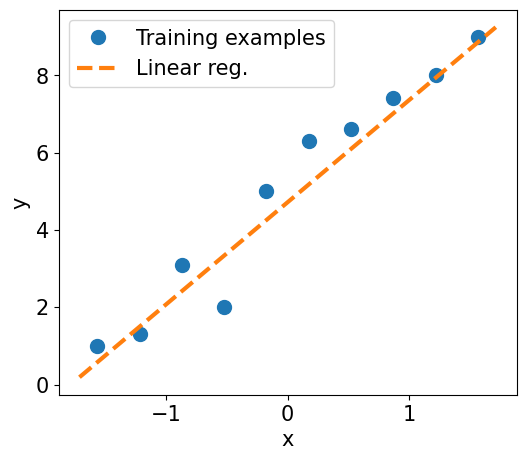

In [39]:
# plotting this shit 

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [40]:
import torch.nn as nn 

loss_func = nn.MSELoss(reduction='mean')
input_size = 1
output_seize = 1
learning_rate = 0.001
model = nn.Linear(input_size, output_seize)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [55]:
for e in range(num_epochs):
    for x_batch, y_batch in dl:
        preds = model(x_batch)[:,0]
        loss = loss_func(preds, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if e %log_epochs == 0:
        print(f'Epoch {e} Loss {loss.item():.4f}')

Epoch 0 Loss 0.0471
Epoch 10 Loss 0.0727
Epoch 20 Loss 0.0743
Epoch 30 Loss 0.0727
Epoch 40 Loss 0.0449
Epoch 50 Loss 0.2379
Epoch 60 Loss 0.7406
Epoch 70 Loss 0.0726
Epoch 80 Loss 0.1394
Epoch 90 Loss 0.0471
Epoch 100 Loss 0.1393
Epoch 110 Loss 0.0055
Epoch 120 Loss 0.2523
Epoch 130 Loss 2.4344
Epoch 140 Loss 0.0743
Epoch 150 Loss 0.0450
Epoch 160 Loss 0.1393
Epoch 170 Loss 0.2523
Epoch 180 Loss 0.0449
Epoch 190 Loss 0.0055


In [56]:
print(f'Final parameters: {model.weight.item(), model.bias.item()}')

Final parameters: (2.706740379333496, 4.96994161605835)


In [57]:
loss_hist = [0,0,0]

loss_hist[1] += 0.4*10

loss_hist

[0, 4.0, 0]